In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Load the data
df = pd.read_pickle('../data_cabspotting/cabspotting.pkl')

In [4]:
lengths_real = df.reset_index().groupby('user').size()

In [6]:
lengths_real.head()

user
abboip      23495
abcoij       5454
abdremlu    21962
abgibo      25095
abjoolaw     8704
dtype: int64

In [17]:
lengths_real = lengths_real.values.reshape(-1, 1)

In [20]:
lengths_real[:5]

array([[23495],
       [ 5454],
       [21962],
       [25095],
       [ 8704]])

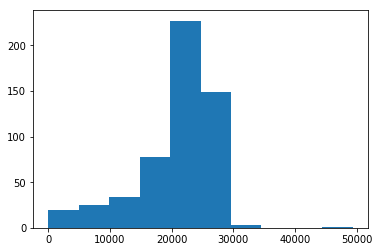

In [27]:
plt.hist(lengths_real)
plt.show()

In [52]:
kde = KernelDensity(bandwidth=0.003)
kde.fit(lengths_real)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.003, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [65]:
lengths_gentd = kde.sample(500)

In [86]:
kde.score_samples(g)

array([-1.93388890e+08, -1.68357874e+07, -7.73700301e+09, -9.91463285e+05,
       -1.05965247e+06, -6.24703042e+08, -2.29952707e+09, -4.71683675e+08,
       -4.75810093e+07, -8.30909589e+07, -2.72857514e+08, -7.81675242e+07,
       -6.08747295e+07, -1.22402842e+06, -7.62358416e+06, -2.12712853e+08,
       -1.19951415e+05, -2.80538758e+08, -9.18150784e+07, -4.12380272e+07,
       -1.45426652e+08, -3.63276658e+07, -8.79843127e+05, -1.44408817e+05,
       -8.05458440e+04, -1.38617257e+07, -1.18182378e+06, -8.02723542e+06,
       -6.14465306e+09, -1.73207831e+08, -2.10292380e+10, -1.48631163e+11,
       -6.72147394e+10, -3.51395462e+08, -4.91805870e+10, -2.13702314e+11,
       -4.93916577e+11, -8.89823375e+11, -1.40142271e+12, -2.02871458e+12,
       -2.77169898e+12, -3.15027198e+12, -2.35434667e+12, -1.67411389e+12,
       -1.10957366e+12, -6.60725954e+11, -3.27570787e+11, -1.10108156e+11,
       -8.33806028e+09, -2.22605000e+10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


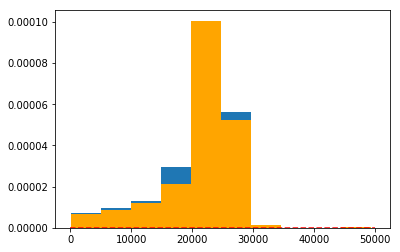

In [83]:
plt.hist(lengths_real, density=True)
plt.hist(lengths_gentd, density=True, color='orange')

g = np.linspace(0, 50000, 50).reshape(-1, 1)
print(np.exp(kde.score_samples(g)))
plt.plot(g, np.exp(kde.score_samples(g)), 'r--')

plt.show()